## [Public Policy 190] Exploring Labor Statistics among U.S. Youth
### Professor Anibel Ferus-Comelo

***

### Learning Outcomes

*Estimated time: 60 minutes

***

### Table of Contents
* Wages among the Youth
* Employment among the Youth
* Data Science Opportunities 

***


In [1]:
#Importing the required modules
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Today, we will be analyzing the characteristics of the labor market for young people in the United States, utilizing the skills we have learned in the two previous Modules notebooks we have been working on in and outside of class. We will discover patters and trends over the years regarding employment and wages among American youth, utilizing datasets from the [US Bureau of Labor Statistics](https://www.bls.gov/data/). Here we define *youth* to be between the ages of 16 and 24 years old. 

## Wages among the Youth

This dataset below represents the earnings of employed persons, derived from the Current Population Survey.  The wages represented include earnings before taxes and other deductions and include any overtime pay, commissions, or tips usually received. 

As you may notice from the names of each column, the dataset covers the total number of workers and median weekly earnings annually for various age groups and sex among the years 2000-2021. 

In [2]:
earnings = Table.read_table("Data/Earnings.csv")
earnings

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,All,361
2001,16-24 Years Old,All,All,375
2002,16-24 Years Old,All,All,381
2003,16-24 Years Old,All,All,387
2004,16-24 Years Old,All,All,390
2005,16-24 Years Old,All,All,397
2006,16-24 Years Old,All,All,409
2007,16-24 Years Old,All,All,424
2008,16-24 Years Old,All,All,443
2009,16-24 Years Old,All,All,442


**Question 1:** In the cell below, create two tables `youth_earnings` and `all_earnings`. 
- `youth_earnings` contains data on 16-24 Year Olds of all Sexes and Ethnicities 
- `all_earnings` contains data on all laborers of all Sexes and Ethnicities

After you assign the table to each variable, compute the average of median weekly earnings for each table and find the difference between their wages. 

In [3]:
#create two separate tables
youth_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("All"))
all_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("All"))

#find the difference in the average median weekly earnings between each table
youth_earnings_avg = np.mean(youth_earnings.column("Median Weekly Earnings"))
average_earnings = np.mean(all_earnings.column("Median Weekly Earnings"))
diff = np.round(average_earnings - youth_earnings_avg, 2)

print("The average American worker makes $",diff, "more than the average American Youth worker on a weekly basis.")

The average American worker makes $ 296.32 more than the average American Youth worker on a weekly basis.


Let's now compare how wages differ among male and female youth, and discover how this trend over the years parallels the overall wage difference between men and women

**Question 2a**: Please create a new table containing the `Year`, `Median Weekly Earnings (16-24 Years Old Men)`, `Median Weekly Earnings (16-24 Years Old Women)` and a column containing the **difference** between the two earnings each year.

In [4]:
youth_male_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("Male")).column("Median Weekly Earnings")
youth_female_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("Female")).column("Median Weekly Earnings")

youth_earnings = youth_earnings.select("Year")
youth_earnings = youth_earnings.with_column("Median Weekly Earnings (16-24 Years Old Men)", youth_male_earnings).with_column("Median Weekly Earnings (16-24 Years Old Women)", youth_female_earnings)
youth_wage_diff = youth_earnings.column("Median Weekly Earnings (16-24 Years Old Men)")-youth_earnings.column("Median Weekly Earnings (16-24 Years Old Women)")

youth_earnings = youth_earnings.with_column("Wage Difference", youth_wage_diff)
youth_earnings

Year,Median Weekly Earnings (16-24 Years Old Men),Median Weekly Earnings (16-24 Years Old Women),Wage Difference
2000,375,344,31
2001,391,353,38
2002,391,367,24
2003,398,371,27
2004,400,375,25
2005,409,381,28
2006,418,395,23
2007,443,409,34
2008,461,420,41
2009,458,424,34


In the cell below, determine what year saw the biggest wage difference between young men and women through a method of your choice. 

*Hint: Two methods you can utilize is creating a visualization or sorting values*

In [5]:
youth_earnings.sort("Wage Difference", descending=True)

Year,Median Weekly Earnings (16-24 Years Old Men),Median Weekly Earnings (16-24 Years Old Women),Wage Difference
2019,607,540,67
2015,510,450,60
2013,479,423,56
2018,575,522,53
2012,468,416,52
2017,547,499,48
2021,650,605,45
2014,493,451,42
2008,461,420,41
2001,391,353,38


Text(0.5, 1.0, 'Wage Differences between Young Men and Women')

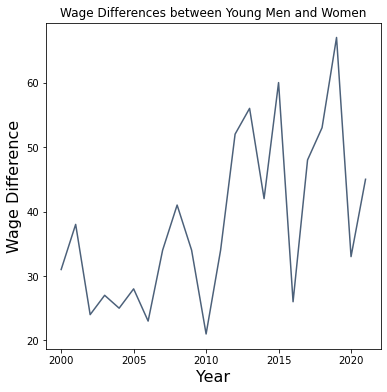

In [6]:
youth_earnings.plot("Year", "Wage Difference")
plt.title("Wage Differences between Young Men and Women")

**Question 2b**: Now create a new table containing the `Year`, `Median Weekly Earnings (Men)`, `Median Weekly Earnings (Women)` and create a new column containing the **difference** between the two earnings each year. Again, in the cell below that, find the year containing the largest wage difference. 

In [7]:
male_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Male")).column("Median Weekly Earnings")
female_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Female")).column("Median Weekly Earnings")

MWearnings = all_earnings.select("Year")
MWearnings = MWearnings.with_column("Median Weekly Earnings (Men)", male_earnings).with_column("Median Weekly Earnings (Women)", female_earnings)
wage_diff = MWearnings.column("Median Weekly Earnings (Men)")-MWearnings.column("Median Weekly Earnings (Women)")

MWearnings = MWearnings.with_column("Wage Difference", wage_diff)
MWearnings

Year,Median Weekly Earnings (Men),Median Weekly Earnings (Women),Wage Difference
2000,641,493,148
2001,670,512,158
2002,679,529,150
2003,695,552,143
2004,713,573,140
2005,722,585,137
2006,743,600,143
2007,766,614,152
2008,798,638,160
2009,819,657,162


In [8]:
MWearnings.sort("Wage Difference", descending=True)

Year,Median Weekly Earnings (Men),Median Weekly Earnings (Women),Wage Difference
2020,1082,891,191
2019,1007,821,186
2021,1097,912,185
2018,973,789,184
2017,941,770,171
2015,895,726,169
2016,915,749,166
2012,854,691,163
2009,819,657,162
2008,798,638,160


Text(0.5, 1.0, 'Wage Differences between Men and Women of All Ages')

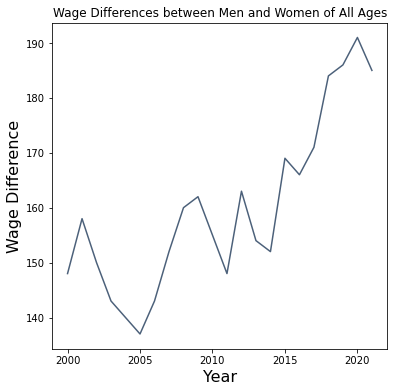

In [9]:
MWearnings.plot("Year", "Wage Difference")
plt.title("Wage Differences between Men and Women of All Ages")

**Question 2c**: Looking at the two graphs you created, what do you notice? Are there similarities between the differences in men and women wages among age groups?

*Type out your answer here*

### Wage differences among youth between ethnicities

The data below was also pulled from the Bureau of Labor Statistics through this data filtering [table](https://www.bls.gov/webapps/legacy/cpswktab3.htm). Feel free to explore through the data and find different statistics.

The table below represents the number of workers and median weekly earnings of workers between 16-24 years old, separated by ethnicity and sex. 

In [10]:
wages_ethnicity = Table.read_table("Data/YouthEarningsbyEthnicity.csv")
wages_ethnicity

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,White,366
2001,16-24 Years Old,All,White,380
2002,16-24 Years Old,All,White,386
2003,16-24 Years Old,All,White,390
2004,16-24 Years Old,All,White,393
2005,16-24 Years Old,All,White,403
2006,16-24 Years Old,All,White,411
2007,16-24 Years Old,All,White,429
2008,16-24 Years Old,All,White,451
2009,16-24 Years Old,All,White,447


In this next section, let's find the largest difference between the average median weekly earnings between two demographic groups.

**Question 3a:** Create a table called `demographic_earnings` containing the mean of Median Weekly Earnings for each possible demographic group combination. Use the `group` function to group the data by Sex and Ethnicity category and aggregate the earnings by finding the mean.

In [11]:
demographic_earnings = wages_ethnicity.group(["Sex", "Ethnicity"], np.mean).select(0,1,4)
demographic_earnings

Sex,Ethnicity,Median Weekly Earnings mean
All,Asian,525.591
All,Black,412.091
All,Latinx,425
All,White,467.591
Female,Asian,519.091
Female,Black,405.818
Female,Latinx,408.318
Female,White,444.455
Male,Asian,536.773
Male,Black,418.773


**Question 3b:** Sort the table you created above in descending order. Find the group that makes the most and the least on average and find the difference between the two earnings. 

In [12]:
demographic_earnings = demographic_earnings.sort("Median Weekly Earnings mean", descending = True)
demographic_earnings

Sex,Ethnicity,Median Weekly Earnings mean
Male,Asian,536.773
All,Asian,525.591
Female,Asian,519.091
Male,White,484.773
All,White,467.591
Female,White,444.455
Male,Latinx,436
All,Latinx,425
Male,Black,418.773
All,Black,412.091


In [13]:
group1 = demographic_earnings.take(0)
group2 = demographic_earnings.take(demographic_earnings.num_rows - 1)

display(group1)
display(group2)

Sex,Ethnicity,Median Weekly Earnings mean
Male,Asian,536.773


Sex,Ethnicity,Median Weekly Earnings mean
Female,Black,405.818


In [15]:
#function used to graph line plots comparing the Median Weekly Earning for two demographic groups over time
def demographics_comparison(s1, e1, s2, e2):
    group1 = wages_ethnicity.where("Ethnicity", are.equal_to(e1)).where("Sex", are.equal_to(s1))
    group2 = wages_ethnicity.where("Ethnicity", are.equal_to(e2)).where("Sex", are.equal_to(s2))
        
    label1 = e1 + " " + s1
    label2 = e2 + " " + s2

    plt.plot(group1["Year"], group1["Median Weekly Earnings"], label = label1)
    plt.plot(group2["Year"], group2["Median Weekly Earnings"], label = label2)
    plt.legend(loc='upper left')
    plt.title('Comparison of Two Demographic Groups')
    plt.xlabel("Year")
    plt.ylabel("Median Weekly Earnings")


    plt.show()

interact(demographics_comparison, 
         s1=widgets.Dropdown(
            options=['All', 'Male', 'Female'],
            value='All',
            description='Sex 1:',
            disabled=False),
         e1=widgets.Dropdown(
            options=['Asian', 'Black', 'Latinx', 'White'],
            value='Asian',
            description='Ethnicity 1:',
            disabled=False),
        s2=widgets.Dropdown(
            options=['All', 'Male', 'Female'],
            value='All',
            description='Sex 2:',
            disabled=False),
         e2=widgets.Dropdown(
            options=['Asian', 'Black', 'Latinx', 'White'],
            value='Black',
            description='Ethnicity 2:',
            disabled=False))
         

interactive(children=(Dropdown(description='Sex 1:', options=('All', 'Male', 'Female'), value='All'), Dropdown…

<function __main__.demographics_comparison(s1, e1, s2, e2)>

### Employment among the Youth

Employment status of the civilian noninstitutional population 16 to 24 years of age by sex, race, and Hispanic or Latino ethnicity, July 2018-2021